# Artificial Neural Networks

In machine learning, a *neural network* is a learning algorithm which aims to simulate a human brain by using layers of *neurons* to process input into output. They boast incredible power, and are often used to tackle extremely difficult problems with high dimensionality inputs.

In this tutorial, we will show how to use the premade neural network package `scikit-neuralnetwork` and then walk through how to program one from the mathematical theory.

## Introduction

At a high level, a neural net performs multistep processing by passing data through its layers of neurons. Each layer is composed of weights which weigh evidence in the inputs to make some abstract conclusions. Each additional layer then takes these conclusions as input to produce even more abstract conclusions. This composition of multiple abstractions is very good at identifying patterns in large, chaotic inputs, like images.

![An image visualizing the different layers of a Convolution Neural Network.](img/convnet.jpeg "Convolutional Neural Network")
<center> A visualization of the different layers of outputs in an image recognition *convolutional* neural network. 
<br /> Source: http://cs231n.github.io/convolutional-networks/ </center>

The above example shows how an image of a car is processed along the layers of a neural network. The conclusions made at each layer are not entirely obvious, but you should be able to see that the network is slowly figuring out the location of the car in the image. It determined the road and the background are not important, and has highlighted the shape and outline of the car in the later stages.

While powerful, neural nets are not often used in practice because they require much time and data to train. However, they can still usually be found as the basis for image-related applications. One notable application of neural nets among the Japanese animation fandom is [waifu2x](http://waifu2x.udp.jp/), which is used for image upscaling. The network takes in a small image as input, and is trained to predict how the image looks like at 2x resolution.

![](img/waifu2x_demo.jpg "Waif2x Demo")
<center> Demo of waifu2x
<br /> Source: http://waifu2x.udp.jp/ </center>

## Playing with a Pre-Built Library

We can examine the capabilities of a neural net using the [`scikit-neuralnetwork` package](http://scikit-neuralnetwork.readthedocs.io/en/latest/guide_model.html).

### Setup

This tutorial was written with the [Anaconda Python package](https://www.continuum.io/downloads) installed on a Windows 10 machine.

Make sure you can run the following commands.

In [1]:
# Should all be available from the Anaconda package.
import numpy as np
import pickle
import cPickle
import gzip
import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt

Next, install the `scikit-neuralnetwork` package. Run the following pip command in console.

```
pip install scikit-neuralnetwork
```

`scikit-neuralnetwork` depends on a package called [Theano](http://deeplearning.net/software/theano/). Theano is a popular optimization package for performing mathematical computation. Optimizations are often necessary in neural networks due to the computational intesity of training one.

If you acquired Theano through the above pip command, then you may need additional steps to get Theano to work.

First try importing `scikit-neuralnetwork`.

In [2]:
# Acquired from the pip-install command.
from sknn.mlp import Classifier, Layer

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


If you get a warning about "missing g++," try the following steps (worked for my Windows 10 machine):

1. Download TDM-GCC (gcc compiler suite for Windows): http://tdm-gcc.tdragon.net/download
2. Check that the command `g++` works in Command Prompt. If not, check that `TDM-GCC-64\bin` is in your system PATH.
3. Run `conda install mingw libpython` in console.

Then try running the import line again.

(Taken from [StackOverflow: How to Install Theano on Anaconda Python 2.7](http://stackoverflow.com/questions/33687103/how-to-install-theano-on-anaconda-python-2-7-x64-on-windows))

### MNIST Intro

We will be working with the classic [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It's a high curated dataset of images of handwritten digits. Each digit is labeled and also scaled and centered as a 28 px x 28 px image. Here are some examples:

![](img/mnist_100_digits.png "100 digits of MNIST")
<center>100 images of digits from the MNIST dataset
<br />Source:  Michael Nielsen's online book [*Neural Network and Deep Learning*](http://neuralnetworksanddeeplearning.com/chap1.html) </center>

We will be using Michael Nielsen's `mnist_loader` from his [online book](http://neuralnetworksanddeeplearning.com/) to load the dataset. `mnist_loader` loads all of the images as 1D-Numpy Arrays of black intensity values as well as labels of each image. It also divides the data into training, validation, and test.

The .py file for `mnist_loader` has been included with this notebook.

### Loading MNIST

Download the following archive (16.3 MB) of MNIST data. No need to uzip it. Just place it in the same folder as this notebook.

https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz

Now load the data.

In [3]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

### Understanding the Data

The inputs (or features) of our data are the 1D Arrays of pixel pntensities:

In [26]:
# Prints the 1D Numpy array representing an image.
print "Image data:"
training_data[0][0]

Image data:


array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

The training data labels (or outputs) are "0", "1", "2", ..., "9", but given as a 1D Numpy Array in a [One-Hot Encoding](https://en.wikipedia.org/wiki/One-hot). In this case, it means that if the image labelled as a "5", then the 5th element of the one-hot encoded array is 1 and the rest of the elements are 0. If an image was labelled "8", then only the 8th element would be 1.

In [5]:
# Prints the training_data labels
# It's 1D Numpy Array which represents a "One-Hot Encoding" of what digit it is
# So if index 5 is 1, then the digit is a "5"
print "Training Data Label:"
print training_data[0][1]

# You can use numpy.argmax to determine the label.
print "This represents the label:", (training_data[0][1]).argmax()

Training Data Label:
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
This represents the label: 5


Only the training data is in one-hot. The validation and test dataset labels are integers.

In [6]:
print "Validation Data Label:"
print validation_data[0][1], type(validation_data[0][1])

print "Testing Data Label:"
print test_data[0][1], type(test_data[0][1])

Validation Data Label:
3 <type 'numpy.int64'>
Testing Data Label:
7 <type 'numpy.int64'>


The image data as an array doesn't really make much sense to us humans. We can get a visual of the array using `matlibplot`. The results should resemble the original image.

The below image shows a 5


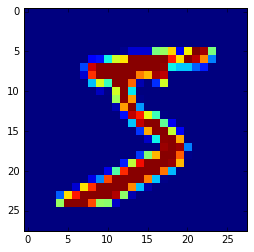

The below image shows a 0


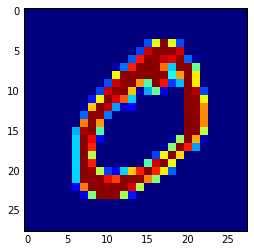

The below image shows a 4


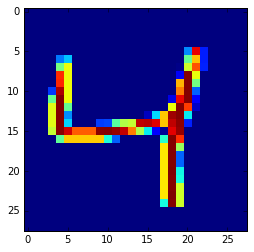

In [7]:
def print_data_point(image, label):
    print "The below image shows a", label
    # Taken from http://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image
    plt.imshow(image.reshape(28,28), interpolation='nearest')
    plt.show()

for image, out in training_data[:3]:
    print_data_point(image, np.argmax(out))

### Training a `Classifier` from `scikit-neuralnetwork`

Now we're ready to use `scikit-neuralnetwork`. The following code prepares the MNIST data as input matracies and vectors.

In [8]:
# Number of samples to use for training.
# You can adjust this if you like. But you really need all the data you can get when training a Neural network
samples_to_use = len(training_data)

# Matrix of inputs. Each row is an example image.
X_train = np.array([image.ravel() for image, out in training_data[:samples_to_use]])
X_test = np.array([image.ravel() for image, out in test_data])

# Matrix of labels. Each row is a label for the corresponding input row
y_train = np.array([[np.argmax(out)] for image,out in training_data[:samples_to_use]])
y_test = np.array([[out] for image, out in test_data])

print X_train
print y_train

print X_test
print y_test

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[5]
 [0]
 [4]
 ..., 
 [8]
 [4]
 [8]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[7]
 [2]
 [1]
 ..., 
 [4]
 [5]
 [6]]


Next, instatiate a `Classifier` neural network from `scikit-neuralnetwork`.

In [9]:
# Add GPU support (beyond the scope of this tutorial)
# If not properly configured, does nothing
from sknn.platform import gpu32

# Instantiate the Classifier
nn = Classifier(
    layers=[
        Layer("Sigmoid", units=100),      # "Hidden Layer" of 100 "neurons" which use the "Sigmoid" as the "activation function"
        Layer("Softmax")                  # "Output Layer" using the Softmax function for classification
    ],                
    learning_rate=.1,                     # Learning Rate alpha for Stochastic Gradient Descent (SGD)
    n_iter=30,                            # Number of iterations of SGD
    batch_size=10,                        # "Mini-batch" size of SGD
    verbose=True)                         # Toggles a progress bar during training

The components in the neural network are explained [later in this tutorial](#The-Theory).

A single function call will train the net. This took approximately 30 seconds on my Intel i5-6600K computer. If you want to skip training and use an example network instead, load the example network in the next section.

In [10]:
nn.fit(X_train, y_train)

C:\Anaconda2\lib\site-packages\theano\tensor\signal\downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Classifier(batch_size=10, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: units=100, name=u'hidden0', frozen=False>,
      layers=[<sknn.nn.Layer `Sigmoid`: units=100, name=u'hidden0', frozen=False>, <sknn.nn.Layer `Softmax`: units=10L, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.1, learning_rule=u'sgd',
      loss_type=None, n_iter=30, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: units=10L, name=u'output', frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=True, warning=None, weight_decay=None)

### Saving and Loading

Once you have finished training, you can save the network and its weights (always a good practice).

In [11]:
# These functions let you save and load a network.

def save_net(net, filename):
    with open(filename, 'wb') as f:
        pickle.dump(net, f)
            
def load_net(filename):
    with open(filename, 'rb') as f:
        net = pickle.load(f)
        return net


In [12]:
# Use them like such:
# save_net(nn, "my_network.pkl")
# nn = load_net("my_network.pkl")

##### If you skipped training, use this code

In [13]:
# Loads an example of a trained scikit-neuralnetwork Classifier
# nn = load_net("example_network.pkl")

### Prediction and Evaluation

Let's get a taste of our trained neural net.

In [14]:
####################################################
# Runs the Trained Neural Network on the test data
####################################################
nn_pred_test = nn.predict(X_test)

[(10000L, 10L)]


The below image shows a 7


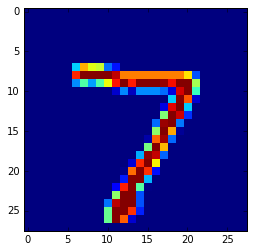

neural net prediction: [7]


The below image shows a 2


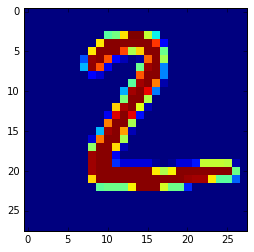

neural net prediction: [2]


The below image shows a 1


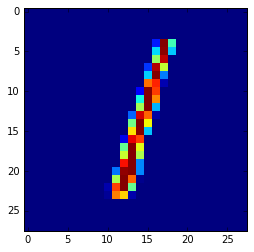

neural net prediction: [1]




In [15]:
#########################################
#  Visually examine some of the results
#########################################
index = 0             # You can skim through the test data with this
num_tests = 3
for i, (image, out) in enumerate(test_data[index:index+num_tests]):
    print_data_point(image, out)
    pred = nn_pred_test[index + i]
    print "neural net prediction:", pred
    print "\n========================\n"

Num incorrect: 212
The below image shows a 5


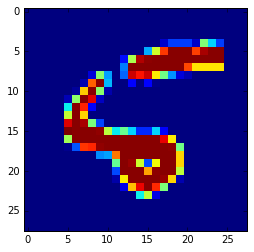

neural net prediction: 6


The below image shows a 2


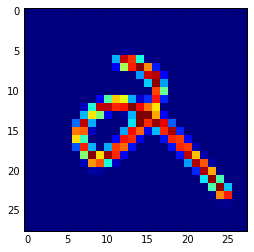

neural net prediction: 4


The below image shows a 4


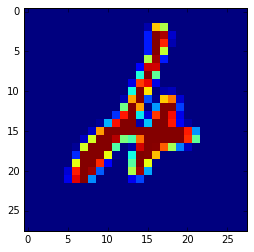

neural net prediction: 6




In [16]:
#######################################################
#  Visually examine some of the incorrect predictions
#     (Do they seem difficult to you?)
#######################################################
nn_incorrect = [(image, pred, actual) for image, pred, actual in zip(X_test, nn_pred_test.ravel(), y_test.ravel()) if pred != actual]
print "Num incorrect:", len(nn_incorrect)

index = 0
num_to_show = 3
for image, pred, actual in nn_incorrect[index:min(len(nn_incorrect), index+num_to_show)]:
    print_data_point(image, actual)
    print "neural net prediction:", pred
    print "\n========================\n"

In [17]:
####################################################
#  The "accuraccy" of this trained neural network
####################################################
nn_accuracy = 1 - (len(nn_incorrect) / float(X_test.shape[0]))
print "Accuracy on test set:", nn_accuracy

Accuracy on test set: 0.9788


The next section explains all of the components and math in a neural network.

## The Theory

![](img/network.png "Diagram of a Neural Network")

A neural network is comprised of multiple layers of nodes. Values are fed from one layer of nodes to the next. The first layer is the **input layer** which produces the input $x$, and the last layer is the **ouput layer** which produces the final computation. In between, we have **hidden layers** whose outputs remain within the network.

A neural network is primarily identified by the number of hidden layers. Typically, a $L$-layer Neural Network has $L-1$ hidden layers. The $L$-th layer is the output layer. The $0$-th layer is the input layer. This tutorial denotes layer number by the variable $k$.

### Neurons

Nodes are called **neurons**, or **units**. A neuron receives the all of output values of the previous layer and produces a single output.

![](img/neuron.png "Concept of a neuron.")

The $output$ of a neuron is created in two steps:

First, a **weighted input** or **hidden layer pre-activation** is computed. We do a weighted sum the inputs according to some **weights** $w_i$ and add a **bias** $b_i$. For the $i$th neuron in a layer, we call this $z_i$. So for example:

$$z_i=w_{i,1}x_i+w_{i,2}x_2+w_{i,3}x_3+b_i$$

Using vectors notation, we can simplify it as:

$$z_i=w_ix+b_i$$

where $w_i$ is a row vector, and $x$ is a column vector.

Second, a **activation function** $g$ is applied to the weighted input $z_i$. The strength of a neural network comes from this step, because the activation function is usually a *non-linear function*, such as the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) $\sigma$. We call the output of this step the **output activation** or **hidden layer activation** $a_i$. Following the previous example:

$$output_i=a_i=g(z_i)=\sigma(w_{i,1}x_i+w_{i,2}x_2+w_{i,3}x_3+b_i)$$

### Building a Layer

So far, we have only considered a single neuron. We can easily expand our notation to a layer of neurons using matracies. Before, for each neuron, we had a row vector of weights $w_i$ and a bias $b_i$ which produced weighted input $z_i$. Now, for the $k$th layer of neurons, we use a matrix $W^k$ whose rows are the $w_i$ row vectors, a column vector $b^k$ whose elements are the $b_i$'s, and a column vector $z^k$ for the $z_i$'s. We represent the whole layer's weighted inputs as:

$$z^k=W^kx+b^k$$

Similarly, for output activations:

$$a^k=g_k(z^k)$$

This translates very nicely to python using `numpy` arrays:

In [18]:
# Here's the non-linear sigmoid function.
# x here can be a numpy array
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# The input x to our layer of neurons
num_inputs = 10
x = np.random.rand(num_inputs)

# Number of neurons in layer k
num_neurons = 5

# Weights of layer k
W_k = np.random.randn(num_neurons, num_inputs)

# Biases of layer k
b_k = np.random.randn(num_neurons)

# Weighted input of layer k
z_k = W_k.dot(x) + b_k

# The activation function
g_k = sigmoid

# The output activation of layer k
a_k = g_k(z_k)

print "Input vector:", x
print "Output Activations:", a_k

Input vector: [ 0.21758967  0.52502138  0.45868448  0.20453271  0.33132335  0.64778998
  0.30865316  0.14240111  0.04716551  0.86088911]
Output Activations: [ 0.58228037  0.77312927  0.45611445  0.08043548  0.52312299]


### Computing a Network

In the last section, we denoted the input to a layer as $x$. In a network, the input to layer $k$ is the output of layer $k-1$. To compute a network, we just successively apply layers one after another, feeding the output of one into the next. So, the algorithm for computing a network looks like:

In [19]:
def identity(x):
    return x

# Number of inputs to the network
num_inputs = 10
# Number of outputs of the network (it's not just a scalar!)
num_outputs = 2 

# Number of neurons/nodes at each layer.
# We have 2 hidden layers here: layers 1 and 2
# Layer 0 is the input layer
# Layer 1 is a hidden layer with 7 neurons
# Layer 2 is a hidden layer with 5 neurons
# Layer 3 is the output layer
N = [num_inputs, 7, 5, num_outputs]

# Weights for each layer. None for index 0 to preserve our indexing notation
W = [None] + [np.random.randn(n_out, n_in) for n_in, n_out in zip(N[:-1], N[1:])]

# Biases for each layer
b = [None] + [np.random.randn(n) for n in N[1:]]

# The Activation function at each layer.
# This can vary for each layer, but we'll do Sigmoid for all of them.
g = [identity] + [sigmoid for n in N[1:]]

# k is a number from 1 ... len(N) - 1
# x is a vector of length N[k-1]
def apply_layer((N, W, b, g), k, x):
    z_k = W[k].dot(x) + b[k]    # Weighted input
    a_k = g[k](z_k)             # Output activation
    return (z_k, a_k)

def compute((N, W, b, g), x):
    z = None
    a = x
    for k in range(1, len(N)):
        z, a = apply_layer((N, W, b, g), k, a)
    return a
        
x = np.random.rand(num_inputs)
y = compute((N, W, b, g), x)
print "x:", x
print "y:", y

x: [ 0.88074506  0.55887648  0.59841642  0.8844166   0.93387852  0.4510958
  0.51661283  0.83135754  0.09290896  0.4360341 ]
y: [ 0.49483959  0.15120296]


### Learning: Minimizing Loss

Like other ML algorithms, a neural network learn by selecting parameters that minimize a total loss over the training data. The parameters are the weights $W^k$ and biases $b^k$. The total loss measures the difference between the network's prediction and the training data output.

For notation, our training data consists of $m$ data points of the form $(x^{(i)},y^{(i)})$. $x^{(i)}$ is an input vector and $y^{(i)}$ is the labelled output. 

For some loss function $l$, we call the total loss $C$ (for "cost") and it looks like:

$$C=\frac{1}{m}\sum_{i=1}^{m}l(compute(x^{(i)}),y^{(i)})$$

We will be using **stochastic gradient descent** to adjust the network's parameters in a direction that lowers the loss. (Disclaimer: this optimization problem is not *convex*, so we may not get the optimal weights.)


### Backpropogation

To perform gradient descent, we need gradients with respect to each training parameter.

We start with the cost gradient with respect to $z^L$, i.e. $\nabla{}C_{z^L}$. This is how much the cost would change if we could somehow vary the weighted inputs $z^L$ in final layer of the neural net.

We label this vector $\delta^L=\nabla{}C_{z^L}$, which is sometimes referred to as the **error**. Using the **chain rule** from calculus, we get that element $i$ is:

$$\delta^L_i=\frac{\partial{}C}{\partial{}z^L_i}=\frac{\partial{}C}{\partial{}g_L(z^L_i)}\frac{\partial{}g_L(z^L_i)}{\partial{}z^L_i}$$

The reason for this factorization is because it is often easy to compute $\frac{\partial{}C}{\partial{}g_L(z^L_i)}$ and $\frac{\partial{}g_L(z^L_i)}{\partial{}z^L_i}$ individually.

$\delta^L$ gives us the gradient with respect to the final layer, but not with respect to the hidden layers. It turns out, with more calculus, we can inductively compute the errors of hidden layers from $\delta^L$. Suppose we know the error for layer $k+1$. We can get the error for layer $k$ with the following equation:

$$\delta^k=(W^{k+1})^T\delta^{k+1}*\frac{\partial{}g_k(z^k)}{\partial{}z^k}$$
<center><sub>The $*$ here is the [Hadamard Product](https://en.wikipedia.org/wiki/Hadamard_product_%28matrices%29), or element-wise multiplication</sub></center>

This formula is the core of **backpropogation**, which is the most crucial part of training a neural network. This lets us compute the errors of hidden layers *backwards* from the final layer. Knowing the error is important, because if we know the error for a layer, we can compute the gradient with respect to each weight and bias. And if we have the gradient, we can fix the weights and biases in gradient descent.

Knowing the errors, the gradient with respect to a bias parameter is:

$$\frac{\partial{}C}{\partial{}b_i^k}=\delta_i^k$$

For weights:

$$\frac{\partial{}C}{\partial{}w^k_{ij}}=a^{k-1}_j\delta_i^k$$

See [Michael Nielsen's page](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_%28optional%29) for how to derive these equations.


### Example: Sigmoid and Mean Squared Error

The sigmoid function and mean squared error are fairly good as demonstrations of this math. Assume that every layer uses the sigmoid function as its activation function.

For the mean squared error, $C$ looks like:

$$C=\frac{1}{m}\sum_{i=1}^m\frac{1}{2}||compute(x^{(i)})-y^{(i)}||_2^2$$

First, we compute the error of the final layer $\delta^L_i=\frac{\partial{}C}{\partial{}g_L(z^L_i)}\frac{\partial{}g_L(z^L_i)}{\partial{}z^L_i}$

Mean Squared Error is nice because the partial $\frac{\partial{}C}{\partial{}g_L(z^L_i)}$ is:

$$\frac{\partial{}C}{\partial{}g_L(z^L_i)}=g_L(z^L_i)-y^{(i)}_i$$

Similarly, the sigmoid function $\sigma$ is nice because the derivative is just:

$$\frac{\partial{}g_L(z^L_i)}{\partial{}z^L_i}=\sigma(z^L_i)(1-\sigma(z^L_i))$$

Together, these two give us:

$$\delta^L=(g_L(z^L)-y^{(i)})*\sigma(z^L)(1-\sigma(z^L))$$

Then, as an example, here is one step of backpropagation:

$$\delta^{L-1}=(W^{L})^T\delta^{L}*\frac{\partial{}g_{L-1}(z^{L-1})}{\partial{}z^{L-1}}=(W^{L})^T\delta^{L}*\sigma(z^{L-1})(1-\sigma(z^{L-1}))$$

This sets up very nicely for an algorithmic approach:

In [20]:
def mse_derivative(g_of_z, y):
    return g_of_z - y

def sigmoid_prime(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

def backpropagation((N, W, b, g), x_train, y_train):
    # L as we defined it
    L = len(N) - 1
    
    # Keep track of all weighted inputs z_k as we perform the "forward" computation
    z = [None for n in N]
    
    # Also keep track of all activation outputs a_k as we perform the forward computation
    a = [None for n in N]
    
    # Perform the forward computation
    a[0] = x_train
    for k in range(1, len(N)):
        z[k], a[k] = apply_layer((N, W, b, g), k, a[k-1]) 
    # a[L] == compute(x_train) == g[L](z[L])
    
    # Compute all the errors
    error = [None for n in N]
    error[L] = mse_derivative(a[L], y_train) * sigmoid_prime(z[L])
    for k in range(L-1, 0, -1):
        error[k] = W[k+1].T.dot(error[k+1]) * sigmoid_prime(z[k])
    
    # Compute the gradient of the cost function with respect to every weight
    dC_dW = [None] + [error[k].reshape((-1, 1)).dot(a[k-1].reshape((1, -1))) for k in range(1, len(N))]
    
    # Compute the gradient of the cost function with respect to every bias
    dC_db = [None] + [delta for delta in error[1:]]
    
    return dC_dW, dC_db

# Arbitrary test of back propagation
x_t = np.random.rand(num_inputs)
y_t = np.array([1,2])
dC_dW, dC_db = backpropagation((N, W, b, g), x_t, y_t)


### Putting it together

Now that we have a method of computing gradients, we can run stochastic gradient descent to tune the parameters.

In [21]:
# Run stochastic gradient descent on the training data with learning rate alpha.
def sgd((N, W, b, g), X_train, y_train, alpha, mb_size):
    indicies = np.random.permutation(X_train.shape[0])
    batches = [indicies[mb_size*k:mb_size*(k+1)] for k in xrange((X_train.shape[0] - 1) / mb_size + 1)]
    for batch in batches:
        X_train_random = X_train[batch]
        y_train_random = y_train[batch]
        dC_dW = [np.zeros(weights.shape) for weights in W[1:]]
        dC_db = [np.zeros(biases.shape) for biases in b[1:]]
        for x, y in zip(X_train_random, y_train_random):
            new_dC_dW, new_dC_db = backpropagation((N, W, b, g), x,y)
            dC_dW = [old+new for old, new in zip(dC_dW, new_dC_dW[1:])]
            dC_dW = [old+new for old, new in zip(dC_dW, new_dC_dW[1:])]
        W = [None] + [weights - (alpha/len(batch)) * grad for weights, grad in zip(W[1:], dC_dW)]
        b = [None] + [biases - (alpha/len(batch)) * grad for biases, grad in zip(b[1:], dC_db)]
    return W, b

# Mean Squared Error loss function
def loss((N, W, b, g), X, y):
    losses = np.array([(np.linalg.norm(compute((N, W, b, g), image) - label)**2.0) / 2.0 for image,label in zip(X, y)])
    return losses.mean()

In [22]:
# Our network needs one-hot encoding of the y-labels.
# Luckily the training data already comes in that form.
y_train_onehot = np.array([out.ravel() for image,out in training_data[:samples_to_use]])

# The input is the 28x28 image as a 1d array.
num_inputs = 28*28
# one-hot encoding output. 10 possible digits.
num_outputs = 10

# Layers of the neural network. We have a hidden layer of 30 neurons here.
N = [num_inputs, 30, num_outputs]

# Randomized initial weights for each layer.
# None for index 0 to follow our indexing notation.
W = [None] + [np.random.randn(n_out, n_in) for n_in, n_out in zip(N[:-1], N[1:])]

# Randomized initial biases for each layer
b = [None] + [np.random.randn(n) for n in N[1:]]

# The Activation function at each layer.
# This can vary for each layer, but we'll do Sigmoid for all of them.
# g[0] is not used, but it should make sense why it would be identity.
# (Recall layer 0 is the input layer)
g = [identity] + [sigmoid for n in N[1:]]

def train_net((N, W, b, g), X, y):
    alpha = 3.0      # Learning rate of Stochastic Gradient Descent (SGD)
    mb_size = 10     # Mini-batch size of SGD
    epochs = 30      # Number of iterations of SGD
    for i in xrange(epochs):
        W, b = sgd((N, W, b, g), X, y, alpha, mb_size)
        print "Done epoch", i, "Loss:", loss((N, W, b, g), X, y)
    return (N, W, b, g)

N, W, b, g = train_net((N, W, b, g), X_train, y_train_onehot)

Done epoch 0 Loss: 0.071482152149
Done epoch 1 Loss: 0.0597220659951
Done epoch 2 Loss: 0.0551451912823
Done epoch 3 Loss: 0.0496413456085
Done epoch 4 Loss: 0.0502638287601
Done epoch 5 Loss: 0.0451315821297
Done epoch 6 Loss: 0.0440403059401
Done epoch 7 Loss: 0.0428243786228
Done epoch 8 Loss: 0.0410503783072
Done epoch 9 Loss: 0.039160789021
Done epoch 10 Loss: 0.0416287915944
Done epoch 11 Loss: 0.0381820592988
Done epoch 12 Loss: 0.0402847903024
Done epoch 13 Loss: 0.0359816119123
Done epoch 14 Loss: 0.0364463006606
Done epoch 15 Loss: 0.0349671776116
Done epoch 16 Loss: 0.0348937847801
Done epoch 17 Loss: 0.0322658508608
Done epoch 18 Loss: 0.0352194403989
Done epoch 19 Loss: 0.0326031901867
Done epoch 20 Loss: 0.0319920227311
Done epoch 21 Loss: 0.0320847679992
Done epoch 22 Loss: 0.0316743708141
Done epoch 23 Loss: 0.029329952143
Done epoch 24 Loss: 0.0307336826967
Done epoch 25 Loss: 0.0293898390603
Done epoch 26 Loss: 0.0288235638422
Done epoch 27 Loss: 0.031554283789
Done e

The below image shows a 7


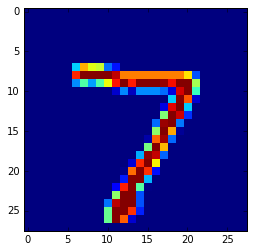

My net: 7


The below image shows a 2


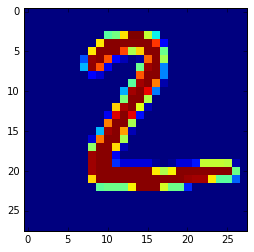

My net: 2


The below image shows a 1


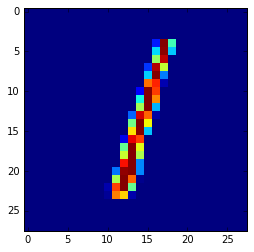

My net: 1




In [23]:
# Visually inspect the results of the trained neural network
for image, out in test_data[0:3]:
    print_data_point(image, out)
    print "My net:", compute((N, W, b, g), image.ravel()).argmax()
    print "\n===========================\n"

In [24]:
# Compute how well the network does on the test set.
my_correct = [(image, pred, actual) for image, actual in zip(X_test, y_test.ravel()) if compute((N, W, b, g), image).argmax() == actual]
print "Num correct:", len(my_correct), "of", X_test.shape[0], "images"
print "Accuraccy:", float(len(my_correct)) / float(X_test.shape[0])

Num correct: 9503 of 10000 images
Accuraccy: 0.9503


The neural net that we have programmed here is defined by `N`, `W`, `b`, and `g`. We can save and load it with the earlier functions like such:

In [25]:
# save_net((N, W, b, g), "theory_net.pkl")
# N, W, b, g = load_net("theory_net.pkl")

## Further Reading

This tutorial covers chapters 1 and 2 of [Michael Nielsen's free online book](http://neuralnetworksanddeeplearning.com/index.html). Following this tutorial, you can start reading from [chatper 3](http://neuralnetworksanddeeplearning.com/chap3.html).

### References

* "10-807 Neural Network I" PowerPoint, by Russ Salakhutdinov, CMU Machine Learning Department
* [A Neural Network in 11 lines of Python (Part 1)](http://iamtrask.github.io/2015/07/12/basic-python-network/), by iamtrask
* "15-381 Deep Learning" PowerPoint, by Emma Brunskill, CMU CS Department